<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projetos de Data Science
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra a descrição do Projeto de Análise de Churn para a empresa Telco.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Consultas </font>
<hr style='border: 2px solid red;'>

> CONSULTAR:

https://www.kaggle.com/datasets/datacertlaboratoria/projeto-5

https://www.kaggle.com/code/datacertlaboratoria/guia-de-resolu-o-projeto-5

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> TELCO é uma empresa jovem e com muito potencial, cujas filiais estão localizadas em 1.106 cidades do estado da Califórnia, Estados Unidos.  </i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> A CEO da empresa queria entender como diminuir a perda de clientes na TELCO, portanto, durante as apresentações, um dos Diretores disse as seguintes hipóteses: 

    1. A perda de clientes na TELCO se deve ao aumento da concorrência. Há cada vez mais concorrentes no mercado, principalmente na região de San Diego, o que nos faz perder mais clientes lá do que em outros lugares.

    2. O problema são os contratos mensais. Se pudéssemos migrar todos os nossos clientes para contratos mais longos, todos os nossos problemas seriam resolvidos.

 </i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Após ouvir as declarações do Diretor, a CEO disse: “É claro para mim que os contratos mês a mês são mais propensos à perda do que os outros, mas como sabemos se esse efeito é o mesmo para todas as idades, ou se é o mesmo para os clientes com mais ou menos antiguidade? Da mesma forma, um cliente que indicou muitos outros clientes tem menos probabilidade de sair, mas como sabemos se o efeito mês a mês é mais ou menos importante do que o número de referências de um cliente? Além disso, assumindo que a estratégia que você propõe acaba sendo a correta, ou seja, em geral buscamos movimentar os clientes para contratos mais longos, como priorizamos? Quem contatamos primeiro? Gostaria de fazer uma análise profunda da situação para entendê-la melhor.”
 </i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Dado esta problemática, ficou acordado o desenvolvimento de um relatório analítico a fim de detectar os principais motivos de Churn, bem como um modelo para combater a situação.
 </i> 
</p>  


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [105]:
## Bibliotecas De Manipulação de Dados e Visualização

import pandas as pd 
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Bibliotecas de Manipulação de Tempo
import time
import datetime


# Bibliotecas de Suporte
import warnings
import pyodbc



# Parâmetros de Otimização
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Conexão SQL Server </font>
<hr style='border: 2px solid red;'>

In [85]:
dados_conexao = (
    'Driver={SQL Server};'
    'Server=DESKTOP-A7BL36E;'
    'Database=TELCO;'
)

conexao = pyodbc.connect(dados_conexao)
print('Conexao Bem Sucedida')

cursor = conexao.cursor()

Conexao Bem Sucedida


In [86]:
demographics_raw = pd.read_sql('SELECT * FROM demographics', conexao)
locations_raw = pd.read_sql('SELECT * FROM locations', conexao)
populations_raw = pd.read_sql('SELECT * FROM populations', conexao)
services_raw = pd.read_sql('SELECT * FROM services', conexao)
status_raw = pd.read_sql('SELECT * FROM status', conexao)

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

* Funções de Visualização

In [87]:
def plota_barras(variavel, dados):
    plt.figure(figsize = (7, 4))
    ax = sns.countplot(x = variavel, data = dados, orient = 'h', color = '#1FB3E5')
    ax.set_title(f'Percentual {variavel}', fontsize = 14)
    ax.set_xlabel(f'{variavel}', fontsize = 14)
    ax.set_ylabel(f'Quantidade', fontsize = 14)
    total = []
    for bar in ax.patches:
        height = bar.get_height()
        total.append(height)
    total = sum(total)
    
    sizes = []
    for bar in ax.patches:
        height = bar.get_height()
        sizes.append(height)
        ax.text(bar.get_x() + bar.get_width()/1.6,
                height+200,
                f'{round((height/total)*100, 2)}%',
                ha = 'center',
                fontsize = 12
        )
    ax.set_ylim(0, max(sizes)*1.1)
    plt.box(False)
    plt.tight_layout()
    plt.show()

def plota_histograma(variavel, dados):
    mediana = dados[variavel].median()
    media = round(dados[variavel].mean(), 2)
    plt.figure(figsize = (7, 4))
    sns.histplot(data = dados, x = variavel, color = '#1FB3E5', bins = 60)
    plt.title(f'Distribuição {variavel}', fontsize = 16)
    plt.xlabel('Intervalo de Valores', fontsize = 14)
    plt.ylabel('Frequência', fontsize = 14)
    plt.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
    plt.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
    plt.box(False)
    plt.legend(loc = 'upper right')
    plt.show()


def plota_boxplot(variavel, dados):
    plt.figure(figsize = (7, 4))
    sns.boxplot(data = dados, x = variavel, orient = 'h', color = '#1FB3E5')
    plt.title(f'Boxplot {variavel}', fontsize = 16)
    plt.xlabel('Intervalo de Valores', fontsize = 14)
    plt.box(False)
    plt.show()


def plota_ranking(x, y, dados, N):
    ranking = dados[[x, y]].drop_duplicates().sort_values(by = x, ascending = False).head(N)
    plt.figure(figsize = (7,4))
    sns.barplot(data = ranking, x = x, y = y, color = '#1FB3E5')
    plt.title(f'Ranking {x}', fontsize = 16)
    plt.xlabel(f'{x}', fontsize = 14)
    plt.ylabel(f'{y}', fontsize = 14)
    plt.box(False)
    plt.show()


* Funções de Encoding

In [88]:
def label_encoding(variavel, dados):
    dados[variavel] = dados[variavel].replace({'Yes':1, 'No':0})
    return dados[variavel]

# <font color='red' style='font-size: 40px;'> 1.0 Entendimento das Bases de Dados </font>
<hr style='border: 2px solid red;'>

## 1.1) DEMOGRAPHICS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Gender: Sexo do cliente: Masculino, Feminino.

> 4. Age: A idade atual do cliente, em anos, no momento em que o trimestre fiscal terminou.

> 5. Under 30: Indica se o cliente tem menos de 30 anos: Sim, Não.

> 6. Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não. 

> 7. Married: Indica se o cliente é casado: Sim, Não.

> 8. Dependents: Indica se o cliente vive com um dependente: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.

> 9. Number of Dependents: Indica o número de dependentes que moram com o cliente.

In [89]:
demographics_trusted = demographics_raw.copy()
print(demographics_trusted.dtypes)
demographics_trusted.head()

Customer ID              object
Count                   float64
Gender                   object
Age                     float64
Under 30                 object
Senior Citizen           object
Married                  object
Dependents               object
Number of Dependents    float64
dtype: object


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1.00,M,78.00,No,Yes,No,No,0.00
1,7495-OOKFY,1.00,F,74.00,No,Yes,Yes,Yes,1.00
2,1658-BYGOY,1.00,M,71.00,No,Yes,No,Yes,3.00
3,4598-XLKNJ,1.00,F,78.00,No,Yes,Yes,Yes,1.00
4,4846-WHAFZ,1.00,F,80.00,No,Yes,Yes,Yes,1.00


## 1.2) LOCATIONS AND POPULATIONS

* LOCATIONS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Country: O país de residência principal do cliente.

> 4. State: O estado da residência principal do cliente.

> 5. City: A principal cidade de residência do cliente.

> 6. Zip Code: O código postal da residência principal do cliente.

> 7. Latitude: A latitude da residência principal do cliente.

> 8. Longitude: A longitude da residência principal do cliente.

* POPULATIONS

> 1. ID: Um ID exclusivo que identifica cada linha.

> 2. Zip Code: O código postal da residência principal do cliente.

> 3. Population: Uma estimativa da população atual para toda a área do código postal.

In [90]:
query = ''' 
SELECT 
    loc.*,
    pop.Population
FROM locations_raw as loc
INNER JOIN populations_raw as pop on loc.[Zip Code] = pop.[Zip Code]
'''
locations_trusted = sqldf(query)
print(locations_trusted.dtypes)
locations_trusted.head()

Customer ID     object
Count          float64
Country         object
State           object
City            object
Zip Code       float64
Latitude       float64
Longitude      float64
Population     float64
dtype: object


,Customer ID,Count,Country,State,City,Zip Code,Latitude,Longitude,Population
0,2856-HYAPG,1.00,United States,California,Platina,96076.00,40367964.00,-122937379.00,215.00
1,4488-PSYCG,1.00,United States,California,Seiad Valley,96086.00,41924174.00,-123260788.00,332.00
2,6906-ANDWJ,1.00,United States,California,Vina,96092.00,39955164.00,-122018567.00,439.00
3,1031-IIDEO,1.00,United States,California,Sierra City,96125.00,39600599.00,-120636358.00,348.00
4,5832-XKAES,1.00,United States,California,Sierraville,96126.00,39559709.00,-120345639.00,227.00


## 1.3) SERVICES

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Qaurter: O trimestre fiscal do qual os dados foram derivados (por exemplo, Q3).

> 4. Referred a Friend: Indica se o cliente já encaminhou um amigo ou familiar para esta empresa: Sim, Não

> 5. Number of Referrals: Indica o número de referências/indicações até esta data que o cliente realizou.

> 6. Tenure in Months: Indica o número total de meses em que o cliente está na empresa no final do trimestre especificado anteriormente.

> 7. Offer: Identifica a última oferta de marketing que o cliente aceitou, se aplicável. Os valores incluem Nenhum, Oferta

> 8. Phone Service: Indica se o cliente contrata o serviço de telefonia residencial com a empresa: Sim, Não

> 9. Avg Monthly Long Distance Charges: Indica as tarifas médias de longa distância do cliente, calculadas no final do trimestre especificado anteriormente.

> 10. Multiple Lines: Indica se o cliente contrata várias linhas telefônicas com a empresa: Sim, Não

> 11. Internet Service: Indica se o cliente contrata o serviço de Internet com a empresa: Não, Sim

> 12. Internet Type: O tipo de internet que o cliente usa DSL, Fibra Óptica, Cabo.

> 13. Avg Monthly GB Download: Indica o volume médio de downloads do cliente em gigabytes, calculado no final do trimestre especificado

> 14. Online Security: Indica se o cliente assina um serviço de segurança online adicional fornecido pela empresa: Sim, Não

> 15. Online Backup: Indica se o cliente assina um serviço de backup online adicional fornecido pela empresa: Sim, Não

> 16. Device protection Plan: Indica se o cliente assina um plano de proteção de dispositivo adicional para o equipamento de Internet fornecido 

> 17. Premium Tech Support: Indica se o cliente assina um plano de suporte técnico adicional da empresa com tempos de espera reduzidos

> 18. Streaming TV: Indica se o cliente usa seu serviço de Internet para transmitir programação de televisão de um provedor terceirizado

> 19. Streaming Movies: Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor externo: Sim, Não. 

> 20. Streaming Music: Indica se o cliente usa seu serviço de Internet para transmitir música de um provedor externo: Sim, Não. A empresa não

> 21. Unlimited Data: Indica se o cliente pagou uma taxa mensal adicional para ter downloads/uploads de dados ilimitados

> 22. Contract: Indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos.

> 23. Paperless Billing: Indica se o cliente optou pelo faturamento sem papel: Sim, Não

> 24. Payment Method: Indica como o cliente paga sua fatura: Saque bancário, cartão de crédito, cheque enviado

> 25. Monthly Charge: Indica a cobrança mensal total atual do cliente para todos os serviços da empresa.

> 26. Total Charges: Indica os encargos totais do cliente, calculados no final do trimestre especificado anteriormente.

> 27. Total Refunds: Indica o total de reembolsos do cliente, calculado no final do trimestre especificado anteriormente.

> 28. Total Extra Data Charges: Indica os encargos totais do cliente para downloads de dados adicionais acima dos especificados em seu plano

> 29. Total Long Distance Charges: Indica o total de tarifas de longa distância do cliente acima das especificadas em seu plano, ao final do trimestre especificado

> 30. Total Revenue: Receita total

In [91]:
services_trusted = services_raw.copy()
print(services_trusted.dtypes)
services_trusted.head()

Customer ID                           object
Count                                float64
Quarter                               object
Referred a Friend                     object
Number of Referrals                  float64
Tenure in Months                     float64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,6133-OZILE,1.00,Q3,No,0.00,18.00,Offer D,No,0.00,No,Yes,DSL,11.00,No,No,Yes,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,352.00,6073.00,0.00,50.00,0.00,6573.00
1,7191-ADRGF,1.00,Q3,Yes,1.00,44.00,None,No,0.00,No,Yes,Cable,18.00,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,543.00,239045.00,0.00,0.00,0.00,239045.00
2,5018-LXQQG,1.00,Q3,Yes,1.00,30.00,Offer C,Yes,1648.00,No,Yes,DSL,17.00,Yes,No,No,Yes,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,663.00,19235.00,0.00,0.00,49440000000000000.00,24179.00
3,6892-BOGQE,1.00,Q3,No,0.00,71.00,Offer A,Yes,1491.00,No,No,None,0.00,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,209.00,14932.00,0.00,0.00,105861.00,255181.00
4,1746-TGTWV,1.00,Q3,Yes,1.00,1.00,Offer E,Yes,3889.00,No,Yes,Fiber Optic,9.00,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Credit Card,7535.00,7535.00,0.00,0.00,3889.00,11424.00


## 1.4) STATUS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Quarter: O trimestre fiscal do qual os dados foram derivados (por exemplo, Q3).

> 4. Customer Status: Indica o status do cliente no final do trimestre: Churned, Stayed ou Joined

> 5. Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu na empresa. Diretamente relacionado

> 6. Churn Value: 1 = o cliente deixou a empresa neste trimestre. 0 = o cliente permaneceu na empresa. Diretamente relacionado ao Churn

> 7. Churn Category: Uma categoria de alto nível para o motivo da rotatividade de clientes: Atitude, Concorrente, Insatisfação, Outros,

> 8. Churn Reason: Motivo específico de um cliente para deixar a empresa. Diretamente relacionado à categoria Churn.

In [92]:
status_trusted = status_raw.copy()
print(status_trusted.dtypes)
status_trusted.head()

Customer ID         object
Count              float64
Quarter             object
Customer Status     object
Churn Label         object
Churn Value        float64
Churn Category      object
Churn Reason        object
dtype: object


,Customer ID,Count,Quarter,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,1.00,Q3,Churned,Yes,1.00,Competitor,Competitor offered more data
1,7495-OOKFY,1.00,Q3,Churned,Yes,1.00,Competitor,Competitor made better offer
2,1658-BYGOY,1.00,Q3,Churned,Yes,1.00,Competitor,Competitor made better offer
3,4598-XLKNJ,1.00,Q3,Churned,Yes,1.00,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1.00,Q3,Churned,Yes,1.00,Price,Extra data charges


# <font color='red' style='font-size: 40px;'> 2.0 Análise Univariada </font>
<hr style='border: 2px solid red;'>

## 1) Como é a Distribuição das características dos clientes (Gênero, Relacionamento, Número de Dependentes e Idade)?

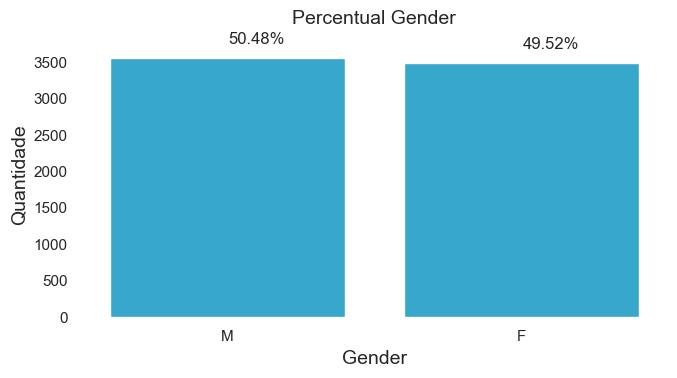

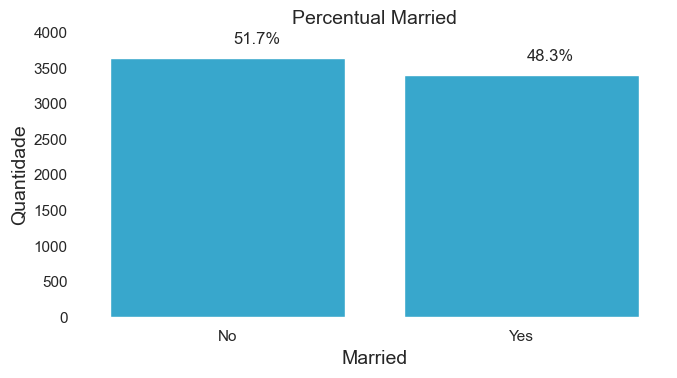

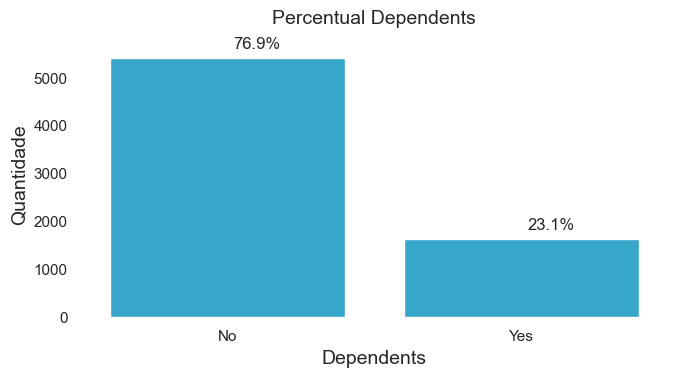

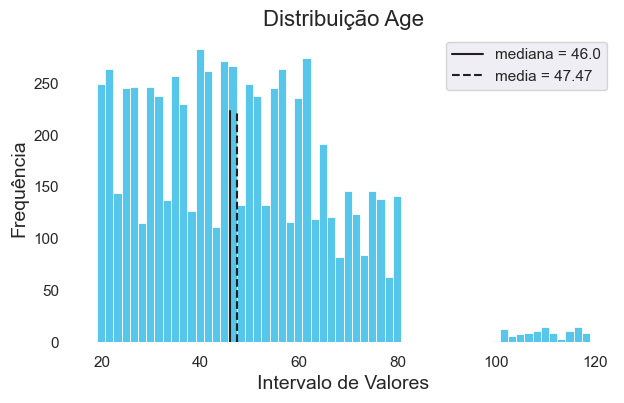

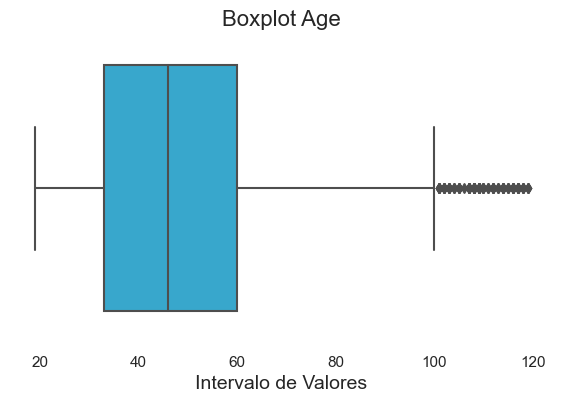

In [93]:
# A variável Gender tem mais de 2 Classes, portanto, deve-se padronizá-la.
demographics_trusted['Gender'].replace({'Male':'M', 'Female':'F'}, inplace = True)

# O número de pessoas com menos de 30 anos e o número de Under 30 deveria ser o mesmo, portanto, será aplicada uma correção.
# O número de pessoas com 65 anos ou mais e o número de idosos deveria ser o mesmo, portanto, será aplicada uma correção.

demographics_trusted['Under 30'] = np.where(demographics_trusted['Age'] < 30, 'Yes', 'No' )
demographics_trusted['Adult'] = np.where(demographics_trusted['Age'].between(30, 65, inclusive = 'left') , 'Yes', 'No' )
demographics_trusted['Senior Citizen'] = np.where(demographics_trusted['Age'] >= 65, 'Yes', 'No' )
demographics_trusted = demographics_trusted[['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Adult','Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents']]

# Plotando Gráficos Analíticos
plota_barras('Gender', demographics_trusted)
plota_barras('Married', demographics_trusted)
plota_barras('Dependents', demographics_trusted)
plota_histograma('Age', demographics_trusted)
plota_boxplot('Age', demographics_trusted)

#### 1. Pelos gráficos acima, nota-se que a quantidade de homens e mulheres, bem como pessoas casadas e solteiras são equilibradas, sendo que boa parte possui algum tipo de dependente.

#### 2. Nota-se também a presença de muitas pessoas de média idade (acima de 30 e abaixo de 65), com aparentemente alguns Outliers com mais de 100 anos. 

## 2) Como é a Distribuição dos serviços?

In [94]:
services_trusted.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,6133-OZILE,1.00,Q3,No,0.00,18.00,Offer D,No,0.00,No,Yes,DSL,11.00,No,No,Yes,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,352.00,6073.00,0.00,50.00,0.00,6573.00
1,7191-ADRGF,1.00,Q3,Yes,1.00,44.00,None,No,0.00,No,Yes,Cable,18.00,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,543.00,239045.00,0.00,0.00,0.00,239045.00
2,5018-LXQQG,1.00,Q3,Yes,1.00,30.00,Offer C,Yes,1648.00,No,Yes,DSL,17.00,Yes,No,No,Yes,No,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,663.00,19235.00,0.00,0.00,49440000000000000.00,24179.00
3,6892-BOGQE,1.00,Q3,No,0.00,71.00,Offer A,Yes,1491.00,No,No,None,0.00,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,209.00,14932.00,0.00,0.00,105861.00,255181.00
4,1746-TGTWV,1.00,Q3,Yes,1.00,1.00,Offer E,Yes,3889.00,No,Yes,Fiber Optic,9.00,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Credit Card,7535.00,7535.00,0.00,0.00,3889.00,11424.00


### 1) Indicações 

Referred a Friend -> Indica se o cliente já encaminhou um amigo ou familiar para a empresa

Number of Referrals -> Indica o número de referências

Tenure In Months -> Indica o número de meses que o cliente está na empresa

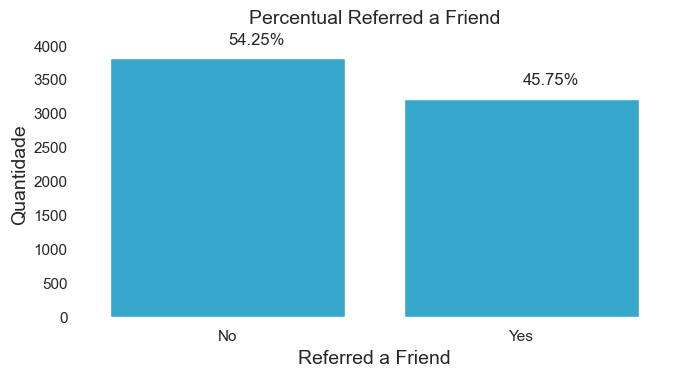

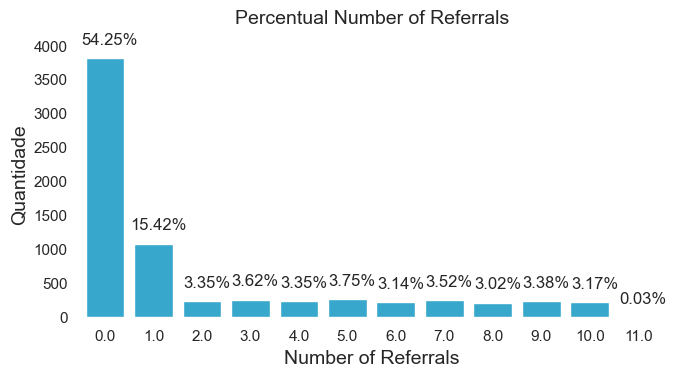

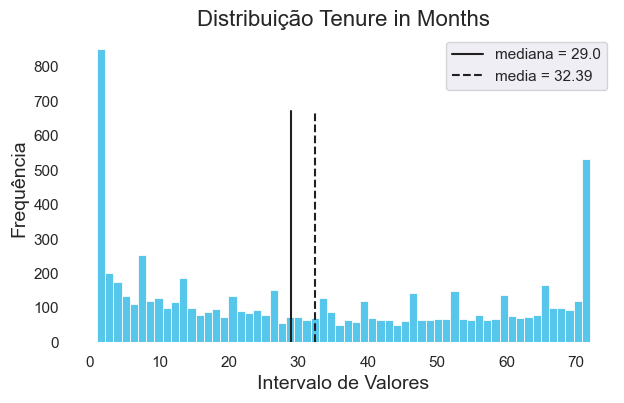

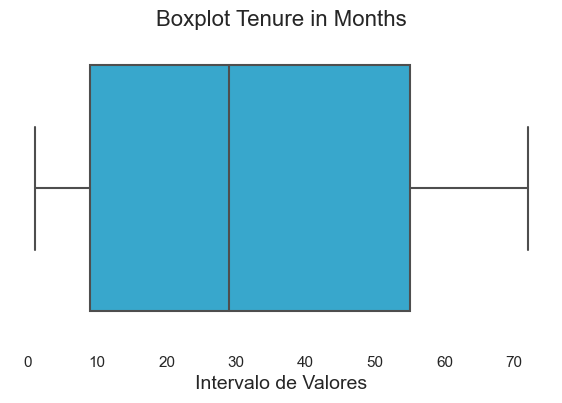

In [95]:
plota_barras('Referred a Friend', services_trusted)
plota_barras('Number of Referrals', services_trusted)
plota_histograma('Tenure in Months', services_trusted)
plota_boxplot('Tenure in Months', services_trusted)

#### 1. 45% dos Clientes recomendou a Telco para pelo menos 1 pessoa.

#### 2. Além disso, há um equilíbrio aparente em relação ao número de meses de fidelidade dos clientes com a marca, embora haja diversos clientes recentes.

### 2) Serviços e Streaming

Phone Service -> Se o cliente contrata o serviço de telefonia

Internet Service -> Indica se o cliente contrata o serviço de Internet 

Online Security -> Indica se o cliente assina um serviço de segurança online 

Online Backup -> Indica se o cliente assina um serviço de backup 

Device Protection Plan -> Indica se o cliente assina um plano de proteção do dispositivo

Premium Tech Support -> Indica se o cliente assina um plano de suporte técnico adicional

Unlimited Data -> Indica se o cliente pagou uma taxa mensal adicional para ter downloads/uploads de dados ilimitados

Streaming TV -> Indica se o cliente utiliza sua Internet para utilizar TV de Provedores Externos

Streaming Movies -> Indica se o cliente  utiliza sua Internet para utilizar Filmes de Provedores Externos

Streaming Music -> Indica se o cliente utiliza sua Internet para utilizar Músicas de Provedores Externos

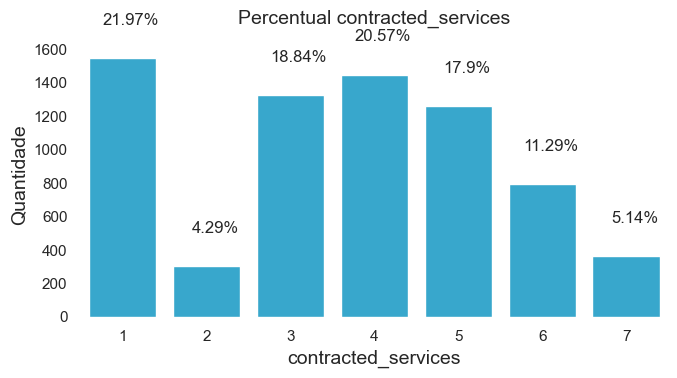

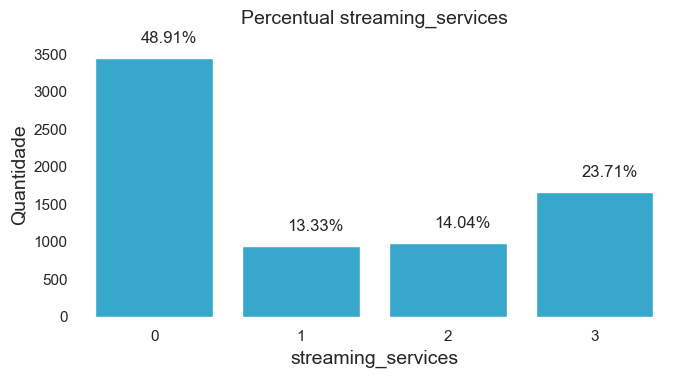

In [96]:
# Serviços
query = ''' 
SELECT 
    [Customer ID],
    SUM(CASE WHEN [Phone Service] = 'Yes' THEN 1 ELSE 0 END) as qt_phone_service,
    SUM(CASE WHEN [Internet Service] = 'Yes' THEN 1 ELSE 0 END) as qt_internet_service,
    SUM(CASE WHEN [Online Security] = 'Yes' THEN 1 ELSE 0 END) as qt_online_security,
    SUM(CASE WHEN [Online Backup] = 'Yes' THEN 1 ELSE 0 END) as qt_online_backup,
    SUM(CASE WHEN [Device Protection Plan] = 'Yes' THEN 1 ELSE 0 END) as qt_device_protection,
    SUM(CASE WHEN [Premium Tech Support] = 'Yes' THEN 1 ELSE 0 END) as qt_premium_tech_support,
    SUM(CASE WHEN [Unlimited Data] = 'Yes' THEN 1 ELSE 0 END) as qt_unlimited_data
FROM services_trusted
GROUP BY 1
ORDER BY 1
'''
ranking = sqldf(query)
soma = ranking.sum(axis = 1)
ranking = pd.concat([ranking, soma], axis = 1).rename({0:'contracted_services'}, axis = 1)
plota_barras('contracted_services', ranking)

# Streaming
query = ''' 
SELECT 
    [Customer ID],
    SUM(CASE WHEN [Streaming TV] = 'Yes' THEN 1 ELSE 0 END) as qt_streaming_tv,
    SUM(CASE WHEN [Streaming Movies] = 'Yes' THEN 1 ELSE 0 END) as qt_streaming_movies,
    SUM(CASE WHEN [Streaming Music] = 'Yes' THEN 1 ELSE 0 END) as qt_streaming_music
FROM services_trusted
GROUP BY 1
ORDER BY 1
'''
ranking = sqldf(query)
soma = ranking.sum(axis = 1)
ranking = pd.concat([ranking, soma], axis = 1).rename({0:'streaming_services'}, axis = 1)
plota_barras('streaming_services', ranking)

#### 1. Em torno de 60% das pessoas contrata 2 ou mais serviços em geral.

### 2. Em torno de 50% das pessosas contrata 1 ou mais serviços de Streaming.

### 4) Sobre o contrato

Contract -> Indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos.

Payment Method -> Indica como o cliente paga sua fatura: Saque bancário, cartão de crédito, cheque enviado

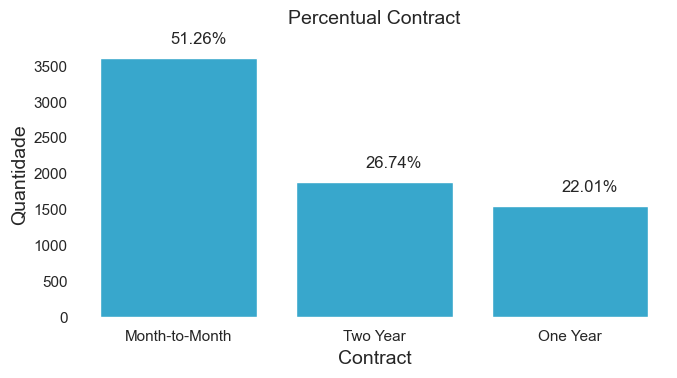

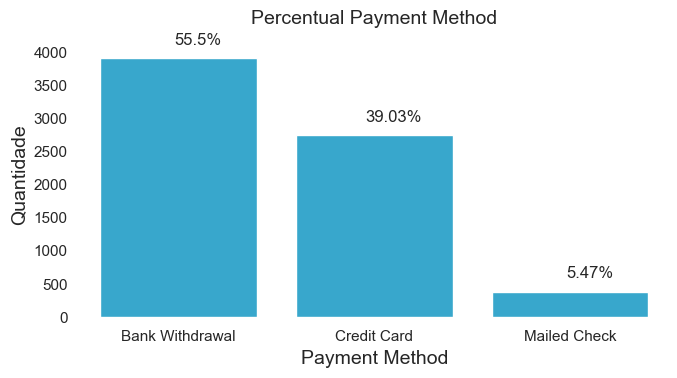

In [109]:
plota_barras('Contract', services_trusted)
plota_barras('Payment Method', services_trusted)

> 1. Em torno da metade dos clientes possuem contratos rápidos (mês-a-mês), ao passo que a outra metade possui contratos longos 

> 2. Mais da metade paga as faturas com saques bancários, ou seja, uma forma um pouco mais arcaica.

## 3) Como é a Distribuição de Cancelamento, bem como as principais Categorias?

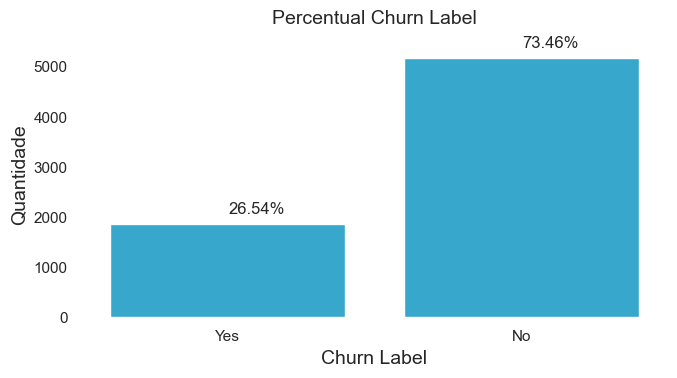

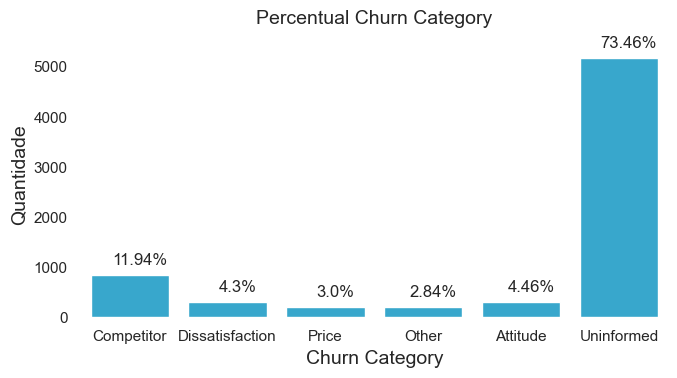

In [97]:
status_trusted['Churn Category'].replace({'':'Uninformed'}, inplace = True)
status_trusted['Churn Reason'].replace({'':'Uninformed'}, inplace = True)
plota_barras('Churn Label', status_trusted)
plota_barras('Churn Category', status_trusted)

#### 1. Nota-se que 1/4 dos Clientes abandonou a Telco, com a seguinte Categoria de Abandono:

    - 73.46 % -> Não Informou
    - 11.94 % -> Trocou para a Concorrência
    - 4.46 % -> Por atitude individual
    - 4.3 % -> Insatisfação
    - 3.0 % -> Preços que não agradavam
    - 2.84 % -> Outros Motivos



# <font color='red' style='font-size: 40px;'> 3.0 Análise Bivariada </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 4.0 Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 5.0 Modelagem I </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 6.0 Modelagem II </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 7.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>